# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [3]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

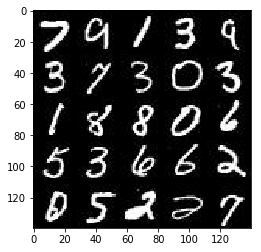

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

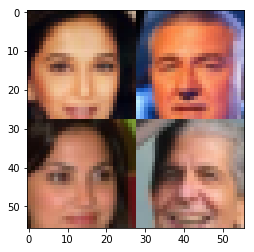

In [5]:
show_n_images = 5

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    #  z_dim = tf.placeholder(tf.float32, (None, z_dim), name='z_dim')
    
    input_real = tf.placeholder(tf.float32,(None,image_width,image_height,image_channels),name='input_real')
    input_z = tf.placeholder(tf.float32,(None,z_dim),name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate') 
    
    return input_real, input_z, learning_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    
        with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(x, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
        
        
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha=0.2
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        print("relu 1 ",relu1)
        
        # 14x14x64
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        print(relu2)
        
        # 7x7x128
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        print(relu3)
        
        # 4x4x256.....
        #x4 = tf.layers.conv2d(relu3, 256, 5, strides=2, padding='valid')
        #bn4 = tf.layers.batch_normalization(x4, training=True)
        #relu4 = tf.maximum(alpha * bn4, bn4)
        

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        print(flat)
        
        return out, logits
    
    
    
    
    # TODO: Implement Function

    # return None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

relu 1  Tensor("Maximum:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Maximum_2:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("Reshape:0", shape=(?, 4096), dtype=float32)
relu 1  Tensor("Maximum_3:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Maximum_4:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Maximum_5:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 4096), dtype=float32)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=training)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=training)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=training)
        x3 = tf.maximum(alpha * x3, x3)
        # 16x16x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, output_dim, 5, strides=2, padding='same')
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
        return out
    """
    
    alpha = 0.2
    usere = not is_train

    with tf.variable_scope('generator', reuse=usere):
        
            # First fully connected layer
            x1 = tf.layers.dense(z, 4*4*256)
            # Reshape it to start the convolutional stack
            x1 = tf.reshape(x1, (-1, 4, 4, 256))
            x1 = tf.layers.batch_normalization(x1, training=is_train)
            #print('hello')
            x1 = tf.maximum(alpha * x1, x1)
            # 4x4x256 now
            print("x1= ", x1)


            x2 = tf.layers.conv2d_transpose(x1, 128, 4, strides=1, padding='valid')
            x2 = tf.layers.batch_normalization(x2, training=is_train)
            x2 = tf.maximum(alpha * x2, x2)
            # 7x7x128 now
            print("x2= ", x2)

            x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
            x3 = tf.layers.batch_normalization(x3, training=is_train)
            x3 = tf.maximum(alpha * x3, x3)
            # 14x14x64 now
            print("x3= ", x3)

            # Output layer
            logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
            # 28x28x3 or 5???!!! now
            print("logits= ", logits)

            out = tf.tanh(logits)
        
    return out
    
    #return None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

x1=  Tensor("Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 5), dtype=float32)
x1=  Tensor("Maximum_3:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("Maximum_4:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("Maximum_5:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("conv2d_transpose_6/BiasAdd:0", shape=(?, 28, 28, 5), dtype=float32)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    
    g_model = generator(input_z, output_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
    """
    alpha = 0.2
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
    
    #return None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

x1=  Tensor("generator/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 4), dtype=float32)
relu 1  Tensor("discriminator/Maximum:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator/Maximum_2:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("discriminator/Reshape:0", shape=(?, 4096), dtype=float32)
relu 1  Tensor("discriminator_1/Maximum:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator_1/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator_1/Maximum_2:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("discriminator_1/Reshape:0", shape=(?, 4096), dtype=float32)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt
    
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [19]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    
    saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_size))

    samples, losses = [], []
    steps = 0

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            for x, y in dataset.batches(batch_size):
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_size))

                # Run optimizers
                _ = sess.run(net.d_opt, feed_dict={net.input_real: x, net.input_z: batch_z})
                _ = sess.run(net.g_opt, feed_dict={net.input_z: batch_z, net.input_real: x})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = net.d_loss.eval({net.input_z: batch_z, net.input_real: x})
                    train_loss_g = net.g_loss.eval({net.input_z: batch_z})

                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    gen_samples = sess.run(
                                   generator(net.input_z, 3, reuse=True, training=False),
                                   feed_dict={net.input_z: sample_z})
                    samples.append(gen_samples)
                    _ = view_samples(-1, samples, 6, 12, figsize=figsize)
                    plt.show()

        saver.save(sess, './checkpoints/generator.ckpt')

    with open('samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    return losses, samples
    """
    # TODO: Build Model
    #saver = tf.train.Saver()
    
    print_every=10
    show_every=100
    
    #print(data_shape)
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    
    input_real, input_z, leaRate = model_inputs(image_width,image_height,image_channels,z_dim)
    d_loss,g_loss = model_loss(input_real, input_z, image_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    
    
    #saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))

    samples, losses = [], []
    steps = 0
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps+=1
                
                # batch images - CHECK THIS.
                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images * 2

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z,leaRate:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images,leaRate:learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                #if steps % show_every == 0:
                   # gen_samples = sess.run(
                                   #generator(input_z, image_channels, is_train=True), feed_dict={input_z: sample_z})
                    #samples.append(gen_samples)
                    #_ = view_samples(-1, samples, 6, 12, figsize=figsize)
                    #plt.show()
                if steps % show_every == 0:
                      show_generator_output(sess, 25, input_z, image_channels, data_image_mode)

        #saver.save(sess, './checkpoints/generator.ckpt')

    #with open('samples.pkl', 'wb') as f:
       # pkl.dump(samples, f)

    return losses, samples

                
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

x1=  Tensor("generator/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)
relu 1  Tensor("discriminator/Maximum:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator/Maximum_2:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("discriminator/Reshape:0", shape=(?, 4096), dtype=float32)
relu 1  Tensor("discriminator_1/Maximum:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator_1/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator_1/Maximum_2:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("discriminator_1/Reshape:0", shape=(?, 4096), dtype=float32)
Epoch 1/2... Discriminator Loss: 2.5792... Generator Loss: 0.0850
Epoch 1/2... Discriminator

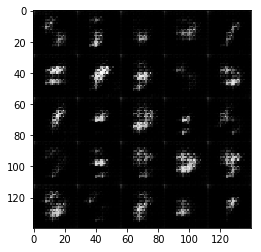

Epoch 1/2... Discriminator Loss: 0.4484... Generator Loss: 2.0746
Epoch 1/2... Discriminator Loss: 0.9361... Generator Loss: 0.7532
Epoch 1/2... Discriminator Loss: 1.3604... Generator Loss: 0.5290
Epoch 1/2... Discriminator Loss: 1.3039... Generator Loss: 0.5615
Epoch 1/2... Discriminator Loss: 1.1198... Generator Loss: 0.7900
Epoch 1/2... Discriminator Loss: 1.0153... Generator Loss: 1.2941
Epoch 1/2... Discriminator Loss: 1.3079... Generator Loss: 2.2278
Epoch 1/2... Discriminator Loss: 0.8211... Generator Loss: 1.2107
Epoch 1/2... Discriminator Loss: 1.2463... Generator Loss: 0.7194
Epoch 1/2... Discriminator Loss: 0.9680... Generator Loss: 0.9001
x1=  Tensor("generator_2/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_2/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_2/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_2/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


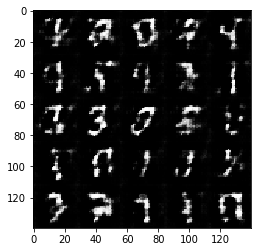

Epoch 1/2... Discriminator Loss: 1.1104... Generator Loss: 1.7094
Epoch 1/2... Discriminator Loss: 1.1290... Generator Loss: 0.6488
Epoch 1/2... Discriminator Loss: 1.0905... Generator Loss: 2.6154
Epoch 1/2... Discriminator Loss: 1.2885... Generator Loss: 0.4561
Epoch 1/2... Discriminator Loss: 1.5030... Generator Loss: 1.5744
Epoch 1/2... Discriminator Loss: 1.0320... Generator Loss: 0.7181
Epoch 1/2... Discriminator Loss: 1.1028... Generator Loss: 2.1710
Epoch 1/2... Discriminator Loss: 0.7733... Generator Loss: 1.0666
Epoch 1/2... Discriminator Loss: 0.8689... Generator Loss: 1.2482
Epoch 1/2... Discriminator Loss: 1.1828... Generator Loss: 0.7217
x1=  Tensor("generator_3/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_3/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_3/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_3/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


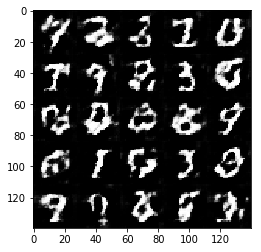

Epoch 1/2... Discriminator Loss: 1.0324... Generator Loss: 0.7981
Epoch 1/2... Discriminator Loss: 0.9256... Generator Loss: 0.8942
Epoch 1/2... Discriminator Loss: 1.2361... Generator Loss: 1.4828
Epoch 1/2... Discriminator Loss: 1.2072... Generator Loss: 0.4814
Epoch 1/2... Discriminator Loss: 1.2538... Generator Loss: 1.4369
Epoch 1/2... Discriminator Loss: 1.3683... Generator Loss: 0.4432
Epoch 1/2... Discriminator Loss: 1.1008... Generator Loss: 1.7482
Epoch 1/2... Discriminator Loss: 1.6075... Generator Loss: 2.3877
Epoch 1/2... Discriminator Loss: 0.9221... Generator Loss: 1.1566
Epoch 1/2... Discriminator Loss: 1.4066... Generator Loss: 0.4524
x1=  Tensor("generator_4/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_4/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_4/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_4/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


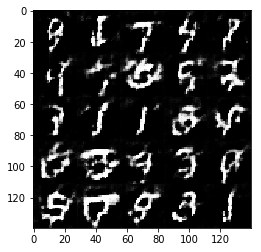

Epoch 1/2... Discriminator Loss: 1.0658... Generator Loss: 0.7667
Epoch 1/2... Discriminator Loss: 1.2346... Generator Loss: 0.6349
Epoch 1/2... Discriminator Loss: 1.1441... Generator Loss: 1.0747
Epoch 1/2... Discriminator Loss: 1.0758... Generator Loss: 0.7042
Epoch 1/2... Discriminator Loss: 1.2502... Generator Loss: 0.5896
Epoch 1/2... Discriminator Loss: 1.3953... Generator Loss: 0.4099
Epoch 1/2... Discriminator Loss: 1.5442... Generator Loss: 0.3810
Epoch 1/2... Discriminator Loss: 0.9850... Generator Loss: 2.0653
Epoch 1/2... Discriminator Loss: 0.9044... Generator Loss: 1.0106
Epoch 1/2... Discriminator Loss: 0.9715... Generator Loss: 1.0472
x1=  Tensor("generator_5/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_5/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_5/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_5/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


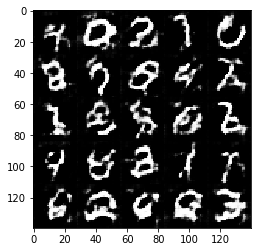

Epoch 1/2... Discriminator Loss: 1.1712... Generator Loss: 0.5906
Epoch 1/2... Discriminator Loss: 0.9456... Generator Loss: 0.9458
Epoch 1/2... Discriminator Loss: 1.7294... Generator Loss: 0.2660
Epoch 1/2... Discriminator Loss: 0.9942... Generator Loss: 1.5521
Epoch 1/2... Discriminator Loss: 1.1458... Generator Loss: 1.6804
Epoch 1/2... Discriminator Loss: 1.5350... Generator Loss: 2.3792
Epoch 1/2... Discriminator Loss: 1.0159... Generator Loss: 1.2236
Epoch 1/2... Discriminator Loss: 1.2308... Generator Loss: 0.5220
Epoch 1/2... Discriminator Loss: 1.4979... Generator Loss: 0.3433
Epoch 1/2... Discriminator Loss: 0.9010... Generator Loss: 1.0615
x1=  Tensor("generator_6/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_6/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_6/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_6/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


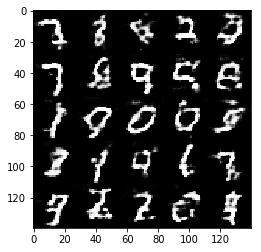

Epoch 1/2... Discriminator Loss: 1.0953... Generator Loss: 0.6755
Epoch 1/2... Discriminator Loss: 1.4356... Generator Loss: 0.3764
Epoch 1/2... Discriminator Loss: 1.1079... Generator Loss: 0.5789
Epoch 1/2... Discriminator Loss: 1.9345... Generator Loss: 0.2034
Epoch 1/2... Discriminator Loss: 1.4809... Generator Loss: 0.3908
Epoch 1/2... Discriminator Loss: 1.0806... Generator Loss: 0.6853
Epoch 1/2... Discriminator Loss: 1.2505... Generator Loss: 0.5023
Epoch 1/2... Discriminator Loss: 0.8166... Generator Loss: 1.5675
Epoch 1/2... Discriminator Loss: 2.5853... Generator Loss: 0.1134
Epoch 1/2... Discriminator Loss: 1.1583... Generator Loss: 0.7719
x1=  Tensor("generator_7/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_7/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_7/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_7/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


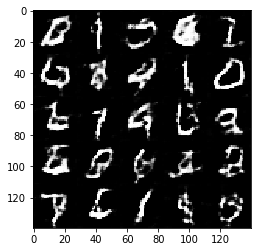

Epoch 1/2... Discriminator Loss: 1.2576... Generator Loss: 0.4557
Epoch 1/2... Discriminator Loss: 2.4857... Generator Loss: 0.1091
Epoch 1/2... Discriminator Loss: 1.1757... Generator Loss: 1.4456
Epoch 1/2... Discriminator Loss: 1.0100... Generator Loss: 0.7947
Epoch 1/2... Discriminator Loss: 1.1228... Generator Loss: 0.5762
Epoch 1/2... Discriminator Loss: 1.0838... Generator Loss: 0.5790
Epoch 1/2... Discriminator Loss: 1.1567... Generator Loss: 0.4792
Epoch 1/2... Discriminator Loss: 0.8602... Generator Loss: 1.0406
Epoch 1/2... Discriminator Loss: 1.1622... Generator Loss: 1.2840
Epoch 1/2... Discriminator Loss: 1.0555... Generator Loss: 1.2824
x1=  Tensor("generator_8/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_8/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_8/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_8/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


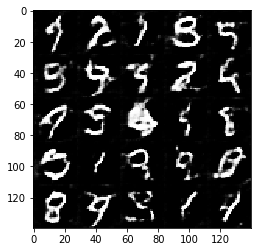

Epoch 1/2... Discriminator Loss: 1.0037... Generator Loss: 0.8012
Epoch 1/2... Discriminator Loss: 1.0173... Generator Loss: 1.8251
Epoch 1/2... Discriminator Loss: 0.9820... Generator Loss: 1.6007
Epoch 1/2... Discriminator Loss: 1.3414... Generator Loss: 0.4294
Epoch 1/2... Discriminator Loss: 0.9938... Generator Loss: 0.9143
Epoch 1/2... Discriminator Loss: 1.5060... Generator Loss: 0.3277
Epoch 1/2... Discriminator Loss: 1.9840... Generator Loss: 3.6109
Epoch 1/2... Discriminator Loss: 0.9293... Generator Loss: 0.9548
Epoch 1/2... Discriminator Loss: 0.7830... Generator Loss: 1.0510
Epoch 1/2... Discriminator Loss: 1.1204... Generator Loss: 0.5724
x1=  Tensor("generator_9/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_9/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_9/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_9/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


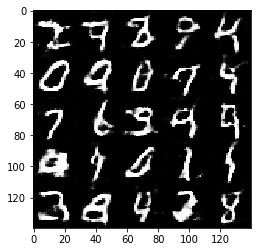

Epoch 1/2... Discriminator Loss: 1.1670... Generator Loss: 0.4761
Epoch 1/2... Discriminator Loss: 1.9655... Generator Loss: 0.2007
Epoch 1/2... Discriminator Loss: 1.1489... Generator Loss: 0.6087
Epoch 1/2... Discriminator Loss: 3.1480... Generator Loss: 4.4180
Epoch 1/2... Discriminator Loss: 0.9146... Generator Loss: 0.9987
Epoch 1/2... Discriminator Loss: 0.8168... Generator Loss: 1.1007
Epoch 1/2... Discriminator Loss: 1.0926... Generator Loss: 0.6690
Epoch 1/2... Discriminator Loss: 0.9762... Generator Loss: 0.8755
Epoch 1/2... Discriminator Loss: 1.5624... Generator Loss: 0.3114
Epoch 1/2... Discriminator Loss: 1.0693... Generator Loss: 0.9324
x1=  Tensor("generator_10/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_10/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_10/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_10/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


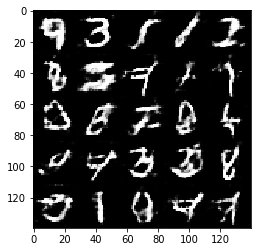

Epoch 1/2... Discriminator Loss: 1.5185... Generator Loss: 0.3835
Epoch 1/2... Discriminator Loss: 1.2243... Generator Loss: 0.7667
Epoch 1/2... Discriminator Loss: 1.0147... Generator Loss: 0.6645
Epoch 1/2... Discriminator Loss: 1.1288... Generator Loss: 0.6790
Epoch 1/2... Discriminator Loss: 2.4801... Generator Loss: 0.1634
Epoch 1/2... Discriminator Loss: 1.4011... Generator Loss: 0.3756
Epoch 1/2... Discriminator Loss: 1.4318... Generator Loss: 0.3454
Epoch 1/2... Discriminator Loss: 1.8488... Generator Loss: 0.2218
Epoch 1/2... Discriminator Loss: 1.8587... Generator Loss: 0.2006
Epoch 1/2... Discriminator Loss: 2.4626... Generator Loss: 3.4299
x1=  Tensor("generator_11/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_11/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_11/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_11/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


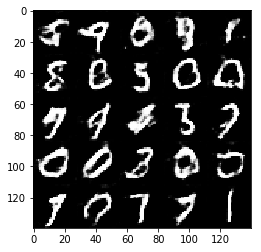

Epoch 1/2... Discriminator Loss: 0.8363... Generator Loss: 0.9887
Epoch 1/2... Discriminator Loss: 0.9850... Generator Loss: 0.8991
Epoch 1/2... Discriminator Loss: 0.8117... Generator Loss: 0.9603
Epoch 1/2... Discriminator Loss: 1.1826... Generator Loss: 0.5043
Epoch 1/2... Discriminator Loss: 2.6173... Generator Loss: 0.0979
Epoch 1/2... Discriminator Loss: 1.2037... Generator Loss: 0.4910
Epoch 1/2... Discriminator Loss: 0.8553... Generator Loss: 1.0776
Epoch 1/2... Discriminator Loss: 0.7480... Generator Loss: 1.3930
Epoch 1/2... Discriminator Loss: 1.0214... Generator Loss: 0.6727
Epoch 1/2... Discriminator Loss: 1.0625... Generator Loss: 0.5648
x1=  Tensor("generator_12/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_12/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_12/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_12/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


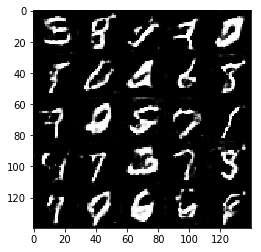

Epoch 1/2... Discriminator Loss: 3.3477... Generator Loss: 4.4842
Epoch 1/2... Discriminator Loss: 1.1908... Generator Loss: 0.5552
Epoch 1/2... Discriminator Loss: 1.1377... Generator Loss: 0.6508
Epoch 1/2... Discriminator Loss: 0.9112... Generator Loss: 1.9739
Epoch 1/2... Discriminator Loss: 1.2782... Generator Loss: 0.5425
Epoch 1/2... Discriminator Loss: 1.0874... Generator Loss: 0.5650
Epoch 1/2... Discriminator Loss: 0.7634... Generator Loss: 0.8554
Epoch 1/2... Discriminator Loss: 0.9260... Generator Loss: 2.3306
Epoch 1/2... Discriminator Loss: 1.2266... Generator Loss: 0.5303
Epoch 1/2... Discriminator Loss: 0.7024... Generator Loss: 1.3081
x1=  Tensor("generator_13/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_13/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_13/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_13/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


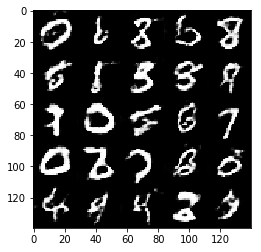

Epoch 1/2... Discriminator Loss: 1.0659... Generator Loss: 0.7503
Epoch 1/2... Discriminator Loss: 0.6824... Generator Loss: 1.8130
Epoch 1/2... Discriminator Loss: 0.9188... Generator Loss: 0.9296
Epoch 1/2... Discriminator Loss: 0.8767... Generator Loss: 0.8196
Epoch 1/2... Discriminator Loss: 0.7215... Generator Loss: 1.2074
Epoch 1/2... Discriminator Loss: 1.6361... Generator Loss: 0.4133
Epoch 1/2... Discriminator Loss: 0.6260... Generator Loss: 1.4095
Epoch 1/2... Discriminator Loss: 1.0824... Generator Loss: 0.5501
Epoch 1/2... Discriminator Loss: 0.9957... Generator Loss: 0.6737
Epoch 1/2... Discriminator Loss: 0.7186... Generator Loss: 1.4250
x1=  Tensor("generator_14/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_14/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_14/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_14/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


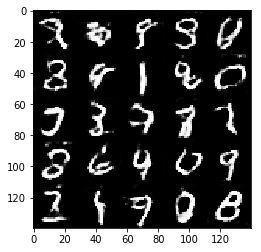

Epoch 1/2... Discriminator Loss: 0.9703... Generator Loss: 0.6715
Epoch 1/2... Discriminator Loss: 0.4909... Generator Loss: 1.8358
Epoch 1/2... Discriminator Loss: 1.0957... Generator Loss: 0.6693
Epoch 1/2... Discriminator Loss: 2.0447... Generator Loss: 0.1899
Epoch 1/2... Discriminator Loss: 1.2528... Generator Loss: 0.4512
Epoch 1/2... Discriminator Loss: 1.4040... Generator Loss: 0.4122
Epoch 1/2... Discriminator Loss: 1.8487... Generator Loss: 0.2430
Epoch 1/2... Discriminator Loss: 1.1136... Generator Loss: 0.6378
Epoch 1/2... Discriminator Loss: 0.9360... Generator Loss: 0.7424
Epoch 1/2... Discriminator Loss: 2.7769... Generator Loss: 0.2239
x1=  Tensor("generator_15/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_15/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_15/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_15/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


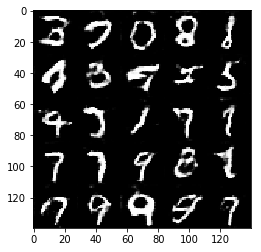

Epoch 1/2... Discriminator Loss: 0.6051... Generator Loss: 2.3936
Epoch 1/2... Discriminator Loss: 0.8152... Generator Loss: 0.8600
Epoch 1/2... Discriminator Loss: 2.0818... Generator Loss: 0.2381
Epoch 1/2... Discriminator Loss: 1.4664... Generator Loss: 0.3564
Epoch 1/2... Discriminator Loss: 1.3824... Generator Loss: 0.5274
Epoch 1/2... Discriminator Loss: 0.5410... Generator Loss: 1.7536
Epoch 1/2... Discriminator Loss: 0.6621... Generator Loss: 2.0322
Epoch 1/2... Discriminator Loss: 0.8409... Generator Loss: 0.8383
Epoch 1/2... Discriminator Loss: 1.1373... Generator Loss: 0.7381
Epoch 1/2... Discriminator Loss: 0.9648... Generator Loss: 1.2026
x1=  Tensor("generator_16/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_16/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_16/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_16/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


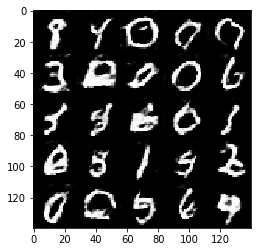

Epoch 1/2... Discriminator Loss: 1.3008... Generator Loss: 0.4956
Epoch 1/2... Discriminator Loss: 1.2881... Generator Loss: 0.5506
Epoch 1/2... Discriminator Loss: 0.7134... Generator Loss: 0.9792
Epoch 1/2... Discriminator Loss: 0.6977... Generator Loss: 1.8650
Epoch 1/2... Discriminator Loss: 1.2536... Generator Loss: 2.3374
Epoch 1/2... Discriminator Loss: 0.7737... Generator Loss: 1.2095
Epoch 1/2... Discriminator Loss: 0.8665... Generator Loss: 0.9264
Epoch 1/2... Discriminator Loss: 0.9678... Generator Loss: 0.6476
Epoch 1/2... Discriminator Loss: 1.0420... Generator Loss: 0.6436
Epoch 1/2... Discriminator Loss: 0.7489... Generator Loss: 0.9714
x1=  Tensor("generator_17/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_17/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_17/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_17/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


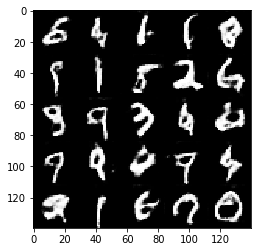

Epoch 1/2... Discriminator Loss: 1.1503... Generator Loss: 0.6776
Epoch 1/2... Discriminator Loss: 1.5681... Generator Loss: 0.3052
Epoch 1/2... Discriminator Loss: 0.8882... Generator Loss: 0.7554
Epoch 1/2... Discriminator Loss: 0.3998... Generator Loss: 1.5971
Epoch 1/2... Discriminator Loss: 0.8406... Generator Loss: 0.7834
Epoch 1/2... Discriminator Loss: 0.9459... Generator Loss: 2.5802
Epoch 1/2... Discriminator Loss: 1.1737... Generator Loss: 0.5690
Epoch 1/2... Discriminator Loss: 0.4700... Generator Loss: 1.5604
Epoch 1/2... Discriminator Loss: 0.7154... Generator Loss: 1.1053
Epoch 1/2... Discriminator Loss: 1.1771... Generator Loss: 0.5206
x1=  Tensor("generator_18/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_18/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_18/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_18/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


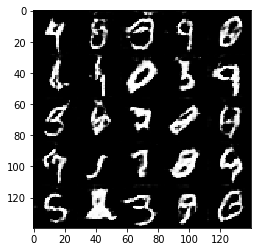

Epoch 1/2... Discriminator Loss: 3.0392... Generator Loss: 0.0854
Epoch 1/2... Discriminator Loss: 1.0046... Generator Loss: 0.7711
Epoch 1/2... Discriminator Loss: 0.9573... Generator Loss: 0.7275
Epoch 1/2... Discriminator Loss: 1.8043... Generator Loss: 0.3005
Epoch 1/2... Discriminator Loss: 0.5066... Generator Loss: 1.3039
Epoch 1/2... Discriminator Loss: 1.2771... Generator Loss: 0.4808
Epoch 1/2... Discriminator Loss: 1.8161... Generator Loss: 0.2839
Epoch 2/2... Discriminator Loss: 0.6832... Generator Loss: 0.9162
Epoch 2/2... Discriminator Loss: 0.9759... Generator Loss: 3.2659
Epoch 2/2... Discriminator Loss: 0.4878... Generator Loss: 2.2542
x1=  Tensor("generator_19/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_19/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_19/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_19/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


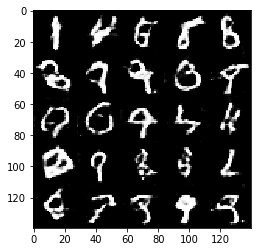

Epoch 2/2... Discriminator Loss: 0.6925... Generator Loss: 1.0353
Epoch 2/2... Discriminator Loss: 0.7087... Generator Loss: 0.9649
Epoch 2/2... Discriminator Loss: 2.3108... Generator Loss: 6.6248
Epoch 2/2... Discriminator Loss: 0.4107... Generator Loss: 1.8647
Epoch 2/2... Discriminator Loss: 0.7162... Generator Loss: 1.0272
Epoch 2/2... Discriminator Loss: 0.6010... Generator Loss: 1.1096
Epoch 2/2... Discriminator Loss: 0.9311... Generator Loss: 0.8306
Epoch 2/2... Discriminator Loss: 0.6762... Generator Loss: 1.2163
Epoch 2/2... Discriminator Loss: 2.3416... Generator Loss: 0.2464
Epoch 2/2... Discriminator Loss: 0.8609... Generator Loss: 0.7638
x1=  Tensor("generator_20/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_20/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_20/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_20/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


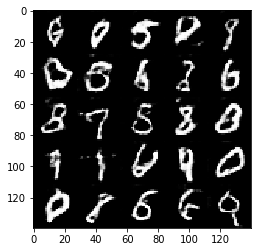

Epoch 2/2... Discriminator Loss: 1.2779... Generator Loss: 0.4772
Epoch 2/2... Discriminator Loss: 0.8061... Generator Loss: 1.0544
Epoch 2/2... Discriminator Loss: 1.1456... Generator Loss: 0.7172
Epoch 2/2... Discriminator Loss: 0.6592... Generator Loss: 1.0019
Epoch 2/2... Discriminator Loss: 2.2755... Generator Loss: 0.1976
Epoch 2/2... Discriminator Loss: 1.0461... Generator Loss: 0.6111
Epoch 2/2... Discriminator Loss: 1.5257... Generator Loss: 0.4218
Epoch 2/2... Discriminator Loss: 1.4690... Generator Loss: 0.3794
Epoch 2/2... Discriminator Loss: 0.7654... Generator Loss: 2.1636
Epoch 2/2... Discriminator Loss: 1.2664... Generator Loss: 0.5626
x1=  Tensor("generator_21/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_21/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_21/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_21/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


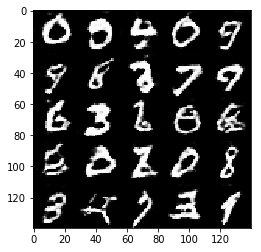

Epoch 2/2... Discriminator Loss: 0.5922... Generator Loss: 1.1872
Epoch 2/2... Discriminator Loss: 0.7636... Generator Loss: 0.9325
Epoch 2/2... Discriminator Loss: 0.2783... Generator Loss: 1.7537
Epoch 2/2... Discriminator Loss: 1.0538... Generator Loss: 0.7766
Epoch 2/2... Discriminator Loss: 1.3715... Generator Loss: 0.4756
Epoch 2/2... Discriminator Loss: 0.4167... Generator Loss: 2.0623
Epoch 2/2... Discriminator Loss: 1.0953... Generator Loss: 0.6173
Epoch 2/2... Discriminator Loss: 2.1997... Generator Loss: 0.2314
Epoch 2/2... Discriminator Loss: 0.7407... Generator Loss: 0.9351
Epoch 2/2... Discriminator Loss: 0.9147... Generator Loss: 0.9164
x1=  Tensor("generator_22/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_22/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_22/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_22/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


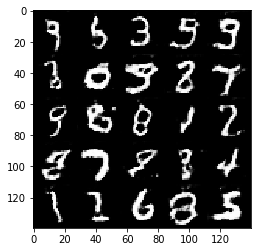

Epoch 2/2... Discriminator Loss: 0.9888... Generator Loss: 0.7384
Epoch 2/2... Discriminator Loss: 1.2842... Generator Loss: 0.4498
Epoch 2/2... Discriminator Loss: 1.9326... Generator Loss: 0.2504
Epoch 2/2... Discriminator Loss: 0.4972... Generator Loss: 1.9525
Epoch 2/2... Discriminator Loss: 0.4980... Generator Loss: 1.7005
Epoch 2/2... Discriminator Loss: 0.3726... Generator Loss: 1.6073
Epoch 2/2... Discriminator Loss: 0.6827... Generator Loss: 1.2455
Epoch 2/2... Discriminator Loss: 0.8471... Generator Loss: 0.8809
Epoch 2/2... Discriminator Loss: 0.4255... Generator Loss: 1.8863
Epoch 2/2... Discriminator Loss: 1.2809... Generator Loss: 0.6068
x1=  Tensor("generator_23/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_23/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_23/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_23/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


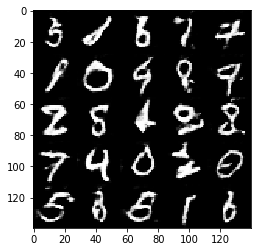

Epoch 2/2... Discriminator Loss: 1.4131... Generator Loss: 0.4379
Epoch 2/2... Discriminator Loss: 0.9442... Generator Loss: 0.7537
Epoch 2/2... Discriminator Loss: 0.4815... Generator Loss: 1.4987
Epoch 2/2... Discriminator Loss: 0.5455... Generator Loss: 1.2047
Epoch 2/2... Discriminator Loss: 0.8857... Generator Loss: 1.1368
Epoch 2/2... Discriminator Loss: 1.9656... Generator Loss: 0.2652
Epoch 2/2... Discriminator Loss: 0.6859... Generator Loss: 1.1332
Epoch 2/2... Discriminator Loss: 0.7615... Generator Loss: 0.9756
Epoch 2/2... Discriminator Loss: 0.8502... Generator Loss: 0.7531
Epoch 2/2... Discriminator Loss: 1.3898... Generator Loss: 0.4621
x1=  Tensor("generator_24/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_24/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_24/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_24/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


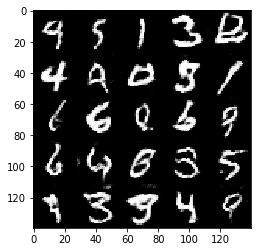

Epoch 2/2... Discriminator Loss: 0.6267... Generator Loss: 1.3601
Epoch 2/2... Discriminator Loss: 0.5671... Generator Loss: 2.9866
Epoch 2/2... Discriminator Loss: 0.8717... Generator Loss: 0.7396
Epoch 2/2... Discriminator Loss: 2.3053... Generator Loss: 0.1980
Epoch 2/2... Discriminator Loss: 0.7213... Generator Loss: 1.0486
Epoch 2/2... Discriminator Loss: 1.9058... Generator Loss: 0.2938
Epoch 2/2... Discriminator Loss: 1.0916... Generator Loss: 2.5047
Epoch 2/2... Discriminator Loss: 1.0698... Generator Loss: 2.6499
Epoch 2/2... Discriminator Loss: 1.6196... Generator Loss: 0.3126
Epoch 2/2... Discriminator Loss: 1.0349... Generator Loss: 0.6435
x1=  Tensor("generator_25/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_25/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_25/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_25/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


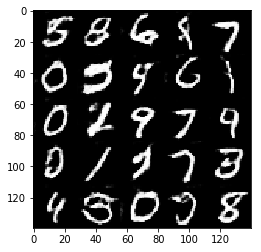

Epoch 2/2... Discriminator Loss: 2.4813... Generator Loss: 0.1592
Epoch 2/2... Discriminator Loss: 0.6664... Generator Loss: 1.4021
Epoch 2/2... Discriminator Loss: 1.7130... Generator Loss: 0.3531
Epoch 2/2... Discriminator Loss: 0.7067... Generator Loss: 2.1829
Epoch 2/2... Discriminator Loss: 0.6406... Generator Loss: 2.2182
Epoch 2/2... Discriminator Loss: 0.9061... Generator Loss: 0.8553
Epoch 2/2... Discriminator Loss: 0.5159... Generator Loss: 1.5828
Epoch 2/2... Discriminator Loss: 0.8765... Generator Loss: 0.8969
Epoch 2/2... Discriminator Loss: 0.5231... Generator Loss: 1.3359
Epoch 2/2... Discriminator Loss: 1.9458... Generator Loss: 5.0850
x1=  Tensor("generator_26/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_26/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_26/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_26/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


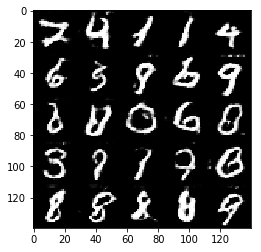

Epoch 2/2... Discriminator Loss: 0.5382... Generator Loss: 1.3488
Epoch 2/2... Discriminator Loss: 0.9652... Generator Loss: 0.6946
Epoch 2/2... Discriminator Loss: 0.8734... Generator Loss: 0.7953
Epoch 2/2... Discriminator Loss: 0.6786... Generator Loss: 1.0053
Epoch 2/2... Discriminator Loss: 0.5658... Generator Loss: 1.9358
Epoch 2/2... Discriminator Loss: 0.5482... Generator Loss: 1.5011
Epoch 2/2... Discriminator Loss: 1.6463... Generator Loss: 0.3469
Epoch 2/2... Discriminator Loss: 0.6297... Generator Loss: 1.1185
Epoch 2/2... Discriminator Loss: 0.5544... Generator Loss: 1.4450
Epoch 2/2... Discriminator Loss: 0.5395... Generator Loss: 1.3762
x1=  Tensor("generator_27/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_27/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_27/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_27/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


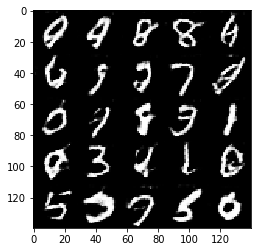

Epoch 2/2... Discriminator Loss: 1.1130... Generator Loss: 0.6278
Epoch 2/2... Discriminator Loss: 0.4365... Generator Loss: 1.4526
Epoch 2/2... Discriminator Loss: 0.9155... Generator Loss: 0.8150
Epoch 2/2... Discriminator Loss: 0.5553... Generator Loss: 3.1895
Epoch 2/2... Discriminator Loss: 0.4501... Generator Loss: 1.7004
Epoch 2/2... Discriminator Loss: 0.7115... Generator Loss: 1.1527
Epoch 2/2... Discriminator Loss: 0.3530... Generator Loss: 2.4337
Epoch 2/2... Discriminator Loss: 0.5499... Generator Loss: 1.4398
Epoch 2/2... Discriminator Loss: 0.5644... Generator Loss: 1.1635
Epoch 2/2... Discriminator Loss: 4.7766... Generator Loss: 0.0222
x1=  Tensor("generator_28/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_28/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_28/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_28/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


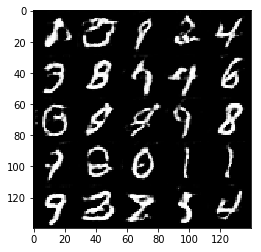

Epoch 2/2... Discriminator Loss: 0.7248... Generator Loss: 1.5324
Epoch 2/2... Discriminator Loss: 0.9060... Generator Loss: 0.9286
Epoch 2/2... Discriminator Loss: 1.5601... Generator Loss: 0.4094
Epoch 2/2... Discriminator Loss: 0.8269... Generator Loss: 0.8404
Epoch 2/2... Discriminator Loss: 0.4172... Generator Loss: 1.9642
Epoch 2/2... Discriminator Loss: 1.3075... Generator Loss: 0.4868
Epoch 2/2... Discriminator Loss: 1.3859... Generator Loss: 0.3953
Epoch 2/2... Discriminator Loss: 1.2181... Generator Loss: 0.6402
Epoch 2/2... Discriminator Loss: 0.5357... Generator Loss: 1.4920
Epoch 2/2... Discriminator Loss: 0.7305... Generator Loss: 0.9700
x1=  Tensor("generator_29/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_29/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_29/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_29/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


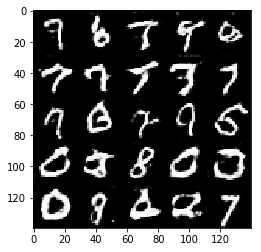

Epoch 2/2... Discriminator Loss: 0.8059... Generator Loss: 0.9031
Epoch 2/2... Discriminator Loss: 0.2710... Generator Loss: 2.3207
Epoch 2/2... Discriminator Loss: 0.8105... Generator Loss: 0.8936
Epoch 2/2... Discriminator Loss: 0.4825... Generator Loss: 1.4189
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 0.8373
Epoch 2/2... Discriminator Loss: 4.3103... Generator Loss: 7.4575
Epoch 2/2... Discriminator Loss: 0.5968... Generator Loss: 1.8615
Epoch 2/2... Discriminator Loss: 1.0026... Generator Loss: 0.7124
Epoch 2/2... Discriminator Loss: 0.7351... Generator Loss: 1.1268
Epoch 2/2... Discriminator Loss: 1.1614... Generator Loss: 4.0890
x1=  Tensor("generator_30/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_30/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_30/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_30/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


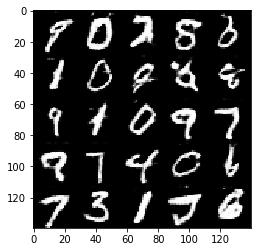

Epoch 2/2... Discriminator Loss: 0.5866... Generator Loss: 1.0888
Epoch 2/2... Discriminator Loss: 1.9830... Generator Loss: 0.2333
Epoch 2/2... Discriminator Loss: 1.0673... Generator Loss: 0.7016
Epoch 2/2... Discriminator Loss: 0.5211... Generator Loss: 1.8365
Epoch 2/2... Discriminator Loss: 0.6438... Generator Loss: 1.1592
Epoch 2/2... Discriminator Loss: 0.9283... Generator Loss: 0.7798
Epoch 2/2... Discriminator Loss: 2.2036... Generator Loss: 0.2543
Epoch 2/2... Discriminator Loss: 2.2619... Generator Loss: 0.2196
Epoch 2/2... Discriminator Loss: 0.3266... Generator Loss: 1.7308
Epoch 2/2... Discriminator Loss: 0.2302... Generator Loss: 2.1949
x1=  Tensor("generator_31/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_31/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_31/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_31/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


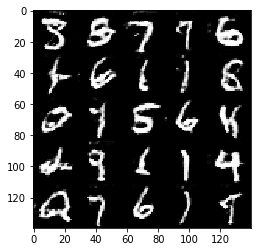

Epoch 2/2... Discriminator Loss: 0.5381... Generator Loss: 1.3869
Epoch 2/2... Discriminator Loss: 0.5914... Generator Loss: 1.5132
Epoch 2/2... Discriminator Loss: 1.6512... Generator Loss: 5.2864
Epoch 2/2... Discriminator Loss: 0.3256... Generator Loss: 2.1512
Epoch 2/2... Discriminator Loss: 0.4601... Generator Loss: 1.5460
Epoch 2/2... Discriminator Loss: 0.5657... Generator Loss: 1.2743
Epoch 2/2... Discriminator Loss: 0.5096... Generator Loss: 1.3871
Epoch 2/2... Discriminator Loss: 0.3922... Generator Loss: 1.5650
Epoch 2/2... Discriminator Loss: 2.5141... Generator Loss: 0.1676
Epoch 2/2... Discriminator Loss: 1.3065... Generator Loss: 0.5143
x1=  Tensor("generator_32/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_32/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_32/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_32/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


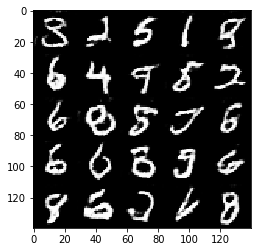

Epoch 2/2... Discriminator Loss: 0.9424... Generator Loss: 0.8183
Epoch 2/2... Discriminator Loss: 1.1887... Generator Loss: 0.5592
Epoch 2/2... Discriminator Loss: 1.4015... Generator Loss: 0.4092
Epoch 2/2... Discriminator Loss: 0.6923... Generator Loss: 0.9478
Epoch 2/2... Discriminator Loss: 0.5769... Generator Loss: 1.1267
Epoch 2/2... Discriminator Loss: 0.5072... Generator Loss: 1.3246
Epoch 2/2... Discriminator Loss: 0.3299... Generator Loss: 1.6451
Epoch 2/2... Discriminator Loss: 0.5008... Generator Loss: 1.3536
Epoch 2/2... Discriminator Loss: 0.8413... Generator Loss: 0.8563
Epoch 2/2... Discriminator Loss: 0.3840... Generator Loss: 1.5603
x1=  Tensor("generator_33/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_33/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_33/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_33/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


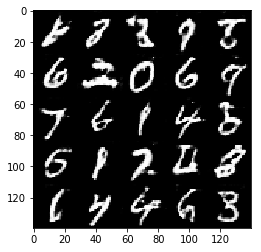

Epoch 2/2... Discriminator Loss: 0.7464... Generator Loss: 0.9580
Epoch 2/2... Discriminator Loss: 1.0047... Generator Loss: 0.8192
Epoch 2/2... Discriminator Loss: 0.8532... Generator Loss: 0.8212
Epoch 2/2... Discriminator Loss: 0.7524... Generator Loss: 0.9426
Epoch 2/2... Discriminator Loss: 1.6336... Generator Loss: 5.8896
Epoch 2/2... Discriminator Loss: 1.9130... Generator Loss: 0.4181
Epoch 2/2... Discriminator Loss: 0.9651... Generator Loss: 0.6057
Epoch 2/2... Discriminator Loss: 0.4954... Generator Loss: 1.8469
Epoch 2/2... Discriminator Loss: 0.6771... Generator Loss: 0.9269
Epoch 2/2... Discriminator Loss: 0.5716... Generator Loss: 1.2631
x1=  Tensor("generator_34/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_34/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_34/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_34/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


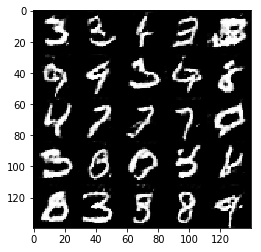

Epoch 2/2... Discriminator Loss: 1.9915... Generator Loss: 0.2685
Epoch 2/2... Discriminator Loss: 0.5655... Generator Loss: 1.4115
Epoch 2/2... Discriminator Loss: 0.2881... Generator Loss: 2.4063
Epoch 2/2... Discriminator Loss: 0.3424... Generator Loss: 2.2659
Epoch 2/2... Discriminator Loss: 1.0085... Generator Loss: 0.6976
Epoch 2/2... Discriminator Loss: 0.3978... Generator Loss: 1.5054
Epoch 2/2... Discriminator Loss: 1.7598... Generator Loss: 0.2906
Epoch 2/2... Discriminator Loss: 1.7642... Generator Loss: 0.6442
Epoch 2/2... Discriminator Loss: 0.4681... Generator Loss: 1.4423
Epoch 2/2... Discriminator Loss: 1.6832... Generator Loss: 0.3379
x1=  Tensor("generator_35/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_35/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_35/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_35/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


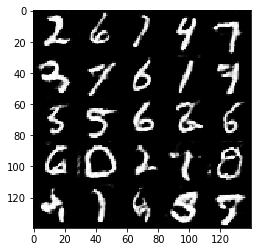

Epoch 2/2... Discriminator Loss: 0.6558... Generator Loss: 2.1673
Epoch 2/2... Discriminator Loss: 1.1845... Generator Loss: 0.5907
Epoch 2/2... Discriminator Loss: 0.4416... Generator Loss: 1.7432
Epoch 2/2... Discriminator Loss: 0.2289... Generator Loss: 2.2337
Epoch 2/2... Discriminator Loss: 0.8746... Generator Loss: 0.9018
Epoch 2/2... Discriminator Loss: 0.5113... Generator Loss: 1.3676
Epoch 2/2... Discriminator Loss: 0.6212... Generator Loss: 1.3000
Epoch 2/2... Discriminator Loss: 0.4881... Generator Loss: 1.3954
Epoch 2/2... Discriminator Loss: 1.2068... Generator Loss: 0.5591
Epoch 2/2... Discriminator Loss: 1.3845... Generator Loss: 0.6349
x1=  Tensor("generator_36/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_36/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_36/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_36/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


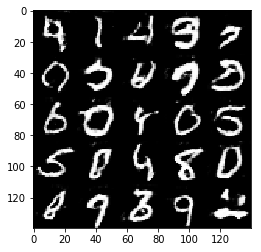

Epoch 2/2... Discriminator Loss: 2.0219... Generator Loss: 0.3175
Epoch 2/2... Discriminator Loss: 0.5032... Generator Loss: 1.9447
Epoch 2/2... Discriminator Loss: 0.5383... Generator Loss: 1.7413
Epoch 2/2... Discriminator Loss: 1.7177... Generator Loss: 0.3567
Epoch 2/2... Discriminator Loss: 0.7039... Generator Loss: 1.0123
Epoch 2/2... Discriminator Loss: 0.7040... Generator Loss: 1.0302
Epoch 2/2... Discriminator Loss: 0.7719... Generator Loss: 1.0480
Epoch 2/2... Discriminator Loss: 0.4593... Generator Loss: 1.3675
Epoch 2/2... Discriminator Loss: 0.4076... Generator Loss: 1.8471
Epoch 2/2... Discriminator Loss: 0.7449... Generator Loss: 0.9382
x1=  Tensor("generator_37/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_37/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_37/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_37/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


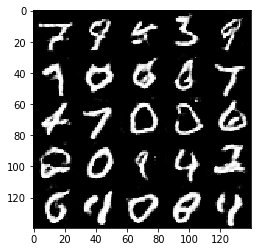

Epoch 2/2... Discriminator Loss: 0.4953... Generator Loss: 1.4936
Epoch 2/2... Discriminator Loss: 0.4558... Generator Loss: 1.4479
Epoch 2/2... Discriminator Loss: 0.5956... Generator Loss: 1.2463
Epoch 2/2... Discriminator Loss: 0.9541... Generator Loss: 0.7757
Epoch 2/2... Discriminator Loss: 2.7349... Generator Loss: 0.2532


In [18]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

x1=  Tensor("generator/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)
relu 1  Tensor("discriminator/Maximum:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator/Maximum_2:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("discriminator/Reshape:0", shape=(?, 4096), dtype=float32)
relu 1  Tensor("discriminator_1/Maximum:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator_1/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator_1/Maximum_2:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("discriminator_1/Reshape:0", shape=(?, 4096), dtype=float32)
Epoch 1/1... Discriminator Loss: 0.7403... Generator Loss: 1.1547
Epoch 1/1... Discriminator

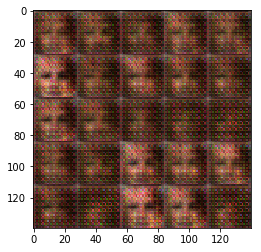

Epoch 1/1... Discriminator Loss: 0.5905... Generator Loss: 4.2376
Epoch 1/1... Discriminator Loss: 0.2025... Generator Loss: 2.4501
Epoch 1/1... Discriminator Loss: 1.1428... Generator Loss: 3.0377
Epoch 1/1... Discriminator Loss: 0.4386... Generator Loss: 2.3776
Epoch 1/1... Discriminator Loss: 0.7451... Generator Loss: 0.8568
Epoch 1/1... Discriminator Loss: 0.3071... Generator Loss: 3.0215
Epoch 1/1... Discriminator Loss: 0.3062... Generator Loss: 3.2063
Epoch 1/1... Discriminator Loss: 1.2954... Generator Loss: 4.2063
Epoch 1/1... Discriminator Loss: 1.2097... Generator Loss: 0.5032
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.5583
x1=  Tensor("generator_2/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_2/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_2/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_2/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


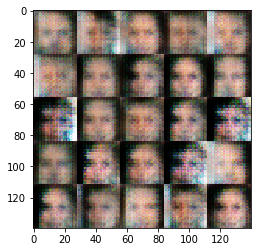

Epoch 1/1... Discriminator Loss: 1.1913... Generator Loss: 0.6635
Epoch 1/1... Discriminator Loss: 1.4718... Generator Loss: 0.5723
Epoch 1/1... Discriminator Loss: 1.4994... Generator Loss: 1.2172
Epoch 1/1... Discriminator Loss: 2.2377... Generator Loss: 3.1768
Epoch 1/1... Discriminator Loss: 1.2491... Generator Loss: 0.5987
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.5752
Epoch 1/1... Discriminator Loss: 1.2284... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 1.7451... Generator Loss: 0.2495
Epoch 1/1... Discriminator Loss: 1.6037... Generator Loss: 0.3936
Epoch 1/1... Discriminator Loss: 1.3009... Generator Loss: 0.5297
x1=  Tensor("generator_3/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_3/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_3/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_3/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


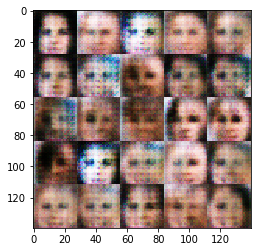

Epoch 1/1... Discriminator Loss: 1.8094... Generator Loss: 0.2780
Epoch 1/1... Discriminator Loss: 1.3483... Generator Loss: 1.9709
Epoch 1/1... Discriminator Loss: 1.4719... Generator Loss: 0.5151
Epoch 1/1... Discriminator Loss: 1.2509... Generator Loss: 1.4154
Epoch 1/1... Discriminator Loss: 1.1289... Generator Loss: 1.6495
Epoch 1/1... Discriminator Loss: 1.2356... Generator Loss: 0.7079
Epoch 1/1... Discriminator Loss: 1.2587... Generator Loss: 0.8325
Epoch 1/1... Discriminator Loss: 0.9084... Generator Loss: 0.9705
Epoch 1/1... Discriminator Loss: 1.6496... Generator Loss: 1.7775
Epoch 1/1... Discriminator Loss: 1.5532... Generator Loss: 0.3599
x1=  Tensor("generator_4/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_4/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_4/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_4/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


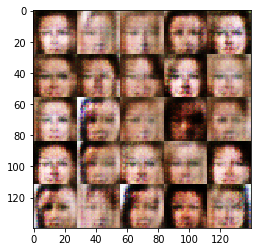

Epoch 1/1... Discriminator Loss: 1.1623... Generator Loss: 0.6295
Epoch 1/1... Discriminator Loss: 1.2645... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.3887... Generator Loss: 2.1573
Epoch 1/1... Discriminator Loss: 1.3065... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.4764... Generator Loss: 0.4451
Epoch 1/1... Discriminator Loss: 1.1396... Generator Loss: 1.4077
Epoch 1/1... Discriminator Loss: 1.3422... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.1085... Generator Loss: 0.9973
Epoch 1/1... Discriminator Loss: 1.9972... Generator Loss: 0.2265
Epoch 1/1... Discriminator Loss: 1.2377... Generator Loss: 0.7153
x1=  Tensor("generator_5/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_5/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_5/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_5/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


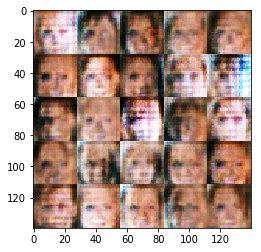

Epoch 1/1... Discriminator Loss: 1.0549... Generator Loss: 1.3185
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.7147
Epoch 1/1... Discriminator Loss: 1.0490... Generator Loss: 0.7630
Epoch 1/1... Discriminator Loss: 1.0070... Generator Loss: 0.8613
Epoch 1/1... Discriminator Loss: 1.1287... Generator Loss: 1.5823
Epoch 1/1... Discriminator Loss: 0.9629... Generator Loss: 0.8838
Epoch 1/1... Discriminator Loss: 1.2252... Generator Loss: 1.1276
Epoch 1/1... Discriminator Loss: 1.2027... Generator Loss: 0.9125
Epoch 1/1... Discriminator Loss: 1.4852... Generator Loss: 0.5282
Epoch 1/1... Discriminator Loss: 1.4745... Generator Loss: 0.4682
x1=  Tensor("generator_6/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_6/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_6/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_6/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


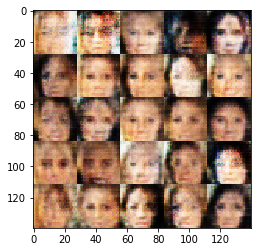

Epoch 1/1... Discriminator Loss: 1.5007... Generator Loss: 0.5118
Epoch 1/1... Discriminator Loss: 1.2211... Generator Loss: 0.9956
Epoch 1/1... Discriminator Loss: 1.0652... Generator Loss: 1.1191
Epoch 1/1... Discriminator Loss: 1.3028... Generator Loss: 1.2276
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 0.9200
Epoch 1/1... Discriminator Loss: 2.0586... Generator Loss: 0.2851
Epoch 1/1... Discriminator Loss: 1.1283... Generator Loss: 1.2467
Epoch 1/1... Discriminator Loss: 1.1589... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 1.3113... Generator Loss: 1.2551
Epoch 1/1... Discriminator Loss: 1.5300... Generator Loss: 0.3757
x1=  Tensor("generator_7/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_7/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_7/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_7/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


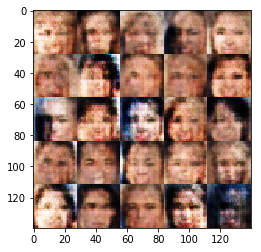

Epoch 1/1... Discriminator Loss: 1.4393... Generator Loss: 1.8991
Epoch 1/1... Discriminator Loss: 1.4213... Generator Loss: 0.9164
Epoch 1/1... Discriminator Loss: 1.2179... Generator Loss: 0.9724
Epoch 1/1... Discriminator Loss: 0.9581... Generator Loss: 0.9828
Epoch 1/1... Discriminator Loss: 1.3601... Generator Loss: 1.7545
Epoch 1/1... Discriminator Loss: 1.3691... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 1.1380
Epoch 1/1... Discriminator Loss: 1.2628... Generator Loss: 0.8559
Epoch 1/1... Discriminator Loss: 1.5933... Generator Loss: 1.9602
Epoch 1/1... Discriminator Loss: 1.1554... Generator Loss: 0.7208
x1=  Tensor("generator_8/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_8/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_8/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_8/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


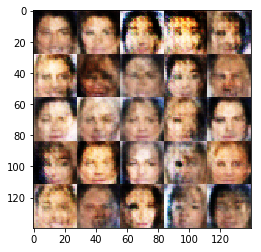

Epoch 1/1... Discriminator Loss: 0.9610... Generator Loss: 0.9901
Epoch 1/1... Discriminator Loss: 1.2712... Generator Loss: 0.9002
Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 0.7827
Epoch 1/1... Discriminator Loss: 1.0623... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 0.9982... Generator Loss: 0.7901
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 0.8594
Epoch 1/1... Discriminator Loss: 1.1318... Generator Loss: 0.7487
Epoch 1/1... Discriminator Loss: 1.5307... Generator Loss: 0.4275
Epoch 1/1... Discriminator Loss: 1.3767... Generator Loss: 0.5530
Epoch 1/1... Discriminator Loss: 1.3035... Generator Loss: 0.8082
x1=  Tensor("generator_9/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_9/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_9/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_9/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


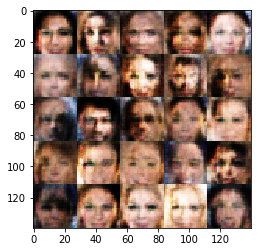

Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 1.1670
Epoch 1/1... Discriminator Loss: 1.2363... Generator Loss: 1.3109
Epoch 1/1... Discriminator Loss: 1.2798... Generator Loss: 0.7872
Epoch 1/1... Discriminator Loss: 1.2429... Generator Loss: 0.9625
Epoch 1/1... Discriminator Loss: 1.2866... Generator Loss: 0.4785
Epoch 1/1... Discriminator Loss: 1.4347... Generator Loss: 0.5741
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.4258
Epoch 1/1... Discriminator Loss: 1.4338... Generator Loss: 0.5496
Epoch 1/1... Discriminator Loss: 1.5149... Generator Loss: 0.3490
Epoch 1/1... Discriminator Loss: 1.5189... Generator Loss: 0.4224
Epoch 1/1... Discriminator Loss: 1.0253... Generator Loss: 0.9425
Epoch 1/1... Discriminator Loss: 1.2412... Generator Loss: 0.5805
Epoch 1/1... Discriminator Loss: 1.2015... Generator Loss: 0.6977
Epoch 1/1... Discriminator Loss: 1.1309... Generator Loss: 0.7487
Epoch 1/1... Discriminator Loss: 1.4219... Generator Loss: 0.4879
Epoch 1/1.

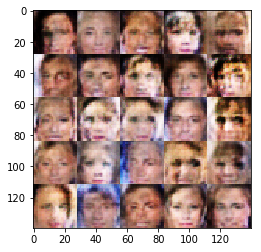

Epoch 1/1... Discriminator Loss: 1.2139... Generator Loss: 1.3415
Epoch 1/1... Discriminator Loss: 1.2506... Generator Loss: 1.6023
Epoch 1/1... Discriminator Loss: 1.0601... Generator Loss: 0.8647
Epoch 1/1... Discriminator Loss: 1.3610... Generator Loss: 0.4508
Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 0.7146
Epoch 1/1... Discriminator Loss: 1.1509... Generator Loss: 0.6049
Epoch 1/1... Discriminator Loss: 0.8993... Generator Loss: 0.9474
Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.2164... Generator Loss: 0.9198
Epoch 1/1... Discriminator Loss: 1.7441... Generator Loss: 2.4155
x1=  Tensor("generator_12/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_12/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_12/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_12/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


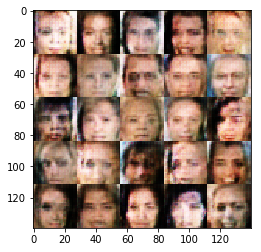

Epoch 1/1... Discriminator Loss: 1.2547... Generator Loss: 0.4916
Epoch 1/1... Discriminator Loss: 1.1812... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.3693... Generator Loss: 0.4675
Epoch 1/1... Discriminator Loss: 1.1138... Generator Loss: 0.6038
Epoch 1/1... Discriminator Loss: 1.1635... Generator Loss: 0.9298
Epoch 1/1... Discriminator Loss: 1.0471... Generator Loss: 0.7164
Epoch 1/1... Discriminator Loss: 1.2459... Generator Loss: 1.1035
Epoch 1/1... Discriminator Loss: 1.2274... Generator Loss: 0.9344
Epoch 1/1... Discriminator Loss: 1.3214... Generator Loss: 0.4931
Epoch 1/1... Discriminator Loss: 1.1526... Generator Loss: 0.9673
x1=  Tensor("generator_13/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_13/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_13/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_13/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


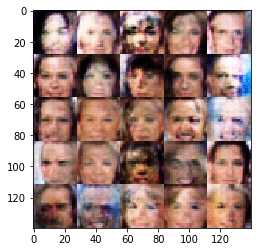

Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 1.2164
Epoch 1/1... Discriminator Loss: 1.5435... Generator Loss: 0.3793
Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 0.6348
Epoch 1/1... Discriminator Loss: 1.2507... Generator Loss: 0.6668
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.4323
Epoch 1/1... Discriminator Loss: 1.2420... Generator Loss: 0.6259
Epoch 1/1... Discriminator Loss: 0.9864... Generator Loss: 1.3216
Epoch 1/1... Discriminator Loss: 1.1651... Generator Loss: 1.3047
Epoch 1/1... Discriminator Loss: 1.1617... Generator Loss: 0.6839
Epoch 1/1... Discriminator Loss: 1.0450... Generator Loss: 0.7650
x1=  Tensor("generator_14/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_14/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_14/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_14/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


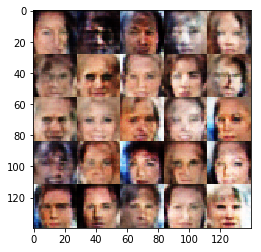

Epoch 1/1... Discriminator Loss: 0.9657... Generator Loss: 0.8279
Epoch 1/1... Discriminator Loss: 1.1257... Generator Loss: 1.0184
Epoch 1/1... Discriminator Loss: 1.1195... Generator Loss: 0.7505
Epoch 1/1... Discriminator Loss: 1.1741... Generator Loss: 0.9743
Epoch 1/1... Discriminator Loss: 1.2175... Generator Loss: 0.6283
Epoch 1/1... Discriminator Loss: 1.1562... Generator Loss: 0.5693
Epoch 1/1... Discriminator Loss: 1.3195... Generator Loss: 0.4670
Epoch 1/1... Discriminator Loss: 1.1743... Generator Loss: 0.8206
Epoch 1/1... Discriminator Loss: 1.1939... Generator Loss: 0.7444
Epoch 1/1... Discriminator Loss: 1.1546... Generator Loss: 0.9887
x1=  Tensor("generator_15/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_15/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_15/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_15/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


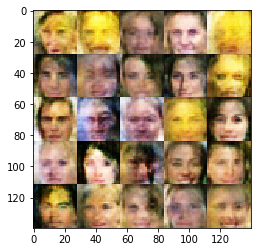

Epoch 1/1... Discriminator Loss: 1.1668... Generator Loss: 0.9191
Epoch 1/1... Discriminator Loss: 1.1701... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 0.4922
Epoch 1/1... Discriminator Loss: 1.1297... Generator Loss: 0.9062
Epoch 1/1... Discriminator Loss: 1.1808... Generator Loss: 0.6749
Epoch 1/1... Discriminator Loss: 1.1736... Generator Loss: 0.5315
Epoch 1/1... Discriminator Loss: 1.2343... Generator Loss: 0.4666
Epoch 1/1... Discriminator Loss: 1.2706... Generator Loss: 0.5188
Epoch 1/1... Discriminator Loss: 1.1690... Generator Loss: 1.0437
Epoch 1/1... Discriminator Loss: 1.4694... Generator Loss: 0.3585
x1=  Tensor("generator_16/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_16/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_16/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_16/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


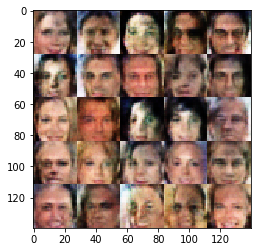

Epoch 1/1... Discriminator Loss: 1.1389... Generator Loss: 1.5168
Epoch 1/1... Discriminator Loss: 1.1804... Generator Loss: 0.5570
Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.9108
Epoch 1/1... Discriminator Loss: 1.1475... Generator Loss: 0.8136
Epoch 1/1... Discriminator Loss: 1.5438... Generator Loss: 0.3367
Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 0.6116
Epoch 1/1... Discriminator Loss: 1.0625... Generator Loss: 1.0686
Epoch 1/1... Discriminator Loss: 1.0582... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 0.9654... Generator Loss: 1.2977
Epoch 1/1... Discriminator Loss: 1.6911... Generator Loss: 0.3079
x1=  Tensor("generator_17/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_17/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_17/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_17/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


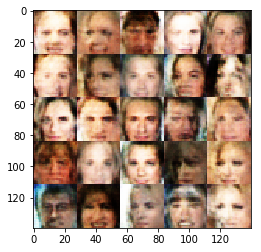

Epoch 1/1... Discriminator Loss: 1.1803... Generator Loss: 0.6191
Epoch 1/1... Discriminator Loss: 1.4283... Generator Loss: 0.4374
Epoch 1/1... Discriminator Loss: 1.1819... Generator Loss: 0.7040
Epoch 1/1... Discriminator Loss: 1.0628... Generator Loss: 0.7581
Epoch 1/1... Discriminator Loss: 1.0970... Generator Loss: 1.1521
Epoch 1/1... Discriminator Loss: 1.1822... Generator Loss: 1.6348
Epoch 1/1... Discriminator Loss: 1.2337... Generator Loss: 1.0897
Epoch 1/1... Discriminator Loss: 1.1746... Generator Loss: 0.8223
Epoch 1/1... Discriminator Loss: 1.2719... Generator Loss: 0.5302
Epoch 1/1... Discriminator Loss: 1.0598... Generator Loss: 1.2881
x1=  Tensor("generator_18/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_18/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_18/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_18/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


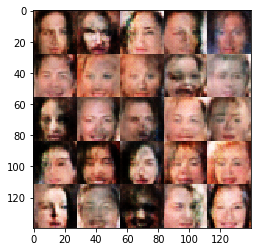

Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.4540
Epoch 1/1... Discriminator Loss: 1.0888... Generator Loss: 0.8150
Epoch 1/1... Discriminator Loss: 1.1694... Generator Loss: 0.6607
Epoch 1/1... Discriminator Loss: 0.9769... Generator Loss: 0.6939
Epoch 1/1... Discriminator Loss: 1.3061... Generator Loss: 1.9068
Epoch 1/1... Discriminator Loss: 1.1187... Generator Loss: 1.4102
Epoch 1/1... Discriminator Loss: 1.2829... Generator Loss: 1.3273
Epoch 1/1... Discriminator Loss: 1.4838... Generator Loss: 0.3962
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 2.0241
Epoch 1/1... Discriminator Loss: 0.9138... Generator Loss: 0.9766
x1=  Tensor("generator_19/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_19/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_19/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_19/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


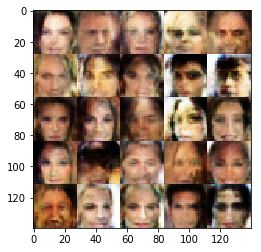

Epoch 1/1... Discriminator Loss: 1.2533... Generator Loss: 1.0596
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.4790
Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 0.5885
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.4464
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 0.5925
Epoch 1/1... Discriminator Loss: 1.1941... Generator Loss: 0.7660
Epoch 1/1... Discriminator Loss: 1.4327... Generator Loss: 0.4432
Epoch 1/1... Discriminator Loss: 1.2500... Generator Loss: 0.6074
Epoch 1/1... Discriminator Loss: 0.9939... Generator Loss: 1.0389
Epoch 1/1... Discriminator Loss: 1.4222... Generator Loss: 0.4599
x1=  Tensor("generator_20/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_20/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_20/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_20/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


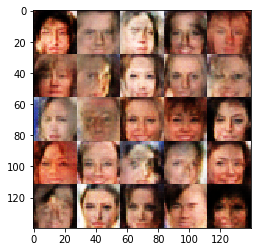

Epoch 1/1... Discriminator Loss: 1.1147... Generator Loss: 0.6648
Epoch 1/1... Discriminator Loss: 1.1743... Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 1.6891
Epoch 1/1... Discriminator Loss: 1.2701... Generator Loss: 0.5773
Epoch 1/1... Discriminator Loss: 1.1375... Generator Loss: 0.5610
Epoch 1/1... Discriminator Loss: 1.2400... Generator Loss: 0.6578
Epoch 1/1... Discriminator Loss: 1.5448... Generator Loss: 1.6777
Epoch 1/1... Discriminator Loss: 1.2448... Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 0.9686... Generator Loss: 1.0820
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.4414
x1=  Tensor("generator_21/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_21/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_21/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_21/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


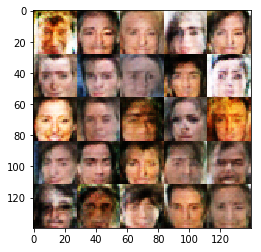

Epoch 1/1... Discriminator Loss: 1.2175... Generator Loss: 0.8386
Epoch 1/1... Discriminator Loss: 1.0844... Generator Loss: 0.6554
Epoch 1/1... Discriminator Loss: 1.4116... Generator Loss: 0.4170
Epoch 1/1... Discriminator Loss: 1.1112... Generator Loss: 0.6561
Epoch 1/1... Discriminator Loss: 1.0023... Generator Loss: 1.1428
Epoch 1/1... Discriminator Loss: 1.1438... Generator Loss: 1.1159
Epoch 1/1... Discriminator Loss: 1.2344... Generator Loss: 0.5864
Epoch 1/1... Discriminator Loss: 1.1457... Generator Loss: 1.1927
Epoch 1/1... Discriminator Loss: 1.2416... Generator Loss: 0.5430
Epoch 1/1... Discriminator Loss: 1.1046... Generator Loss: 0.8766
x1=  Tensor("generator_22/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_22/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_22/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_22/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


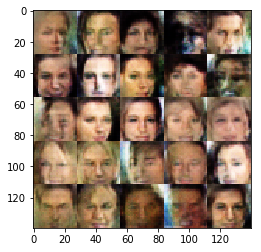

Epoch 1/1... Discriminator Loss: 1.0917... Generator Loss: 0.8502
Epoch 1/1... Discriminator Loss: 1.5001... Generator Loss: 0.3496
Epoch 1/1... Discriminator Loss: 1.1591... Generator Loss: 0.5777
Epoch 1/1... Discriminator Loss: 0.9970... Generator Loss: 1.1596
Epoch 1/1... Discriminator Loss: 1.5668... Generator Loss: 0.3836
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.5735
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 1.8571
Epoch 1/1... Discriminator Loss: 1.1597... Generator Loss: 0.5828
Epoch 1/1... Discriminator Loss: 1.1110... Generator Loss: 0.7405
Epoch 1/1... Discriminator Loss: 1.1249... Generator Loss: 0.7287
x1=  Tensor("generator_23/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_23/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_23/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_23/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


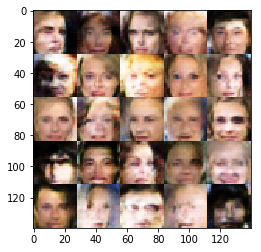

Epoch 1/1... Discriminator Loss: 1.1405... Generator Loss: 0.7744
Epoch 1/1... Discriminator Loss: 1.1954... Generator Loss: 0.7925
Epoch 1/1... Discriminator Loss: 1.5234... Generator Loss: 1.3775
Epoch 1/1... Discriminator Loss: 1.4732... Generator Loss: 0.4565
Epoch 1/1... Discriminator Loss: 1.1236... Generator Loss: 1.0803
Epoch 1/1... Discriminator Loss: 1.2077... Generator Loss: 0.6719
Epoch 1/1... Discriminator Loss: 1.1438... Generator Loss: 1.1798
Epoch 1/1... Discriminator Loss: 1.0665... Generator Loss: 1.3581
Epoch 1/1... Discriminator Loss: 1.1039... Generator Loss: 1.3959
Epoch 1/1... Discriminator Loss: 1.1427... Generator Loss: 1.2641
x1=  Tensor("generator_24/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_24/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_24/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_24/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


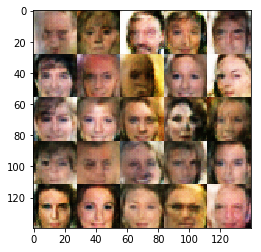

Epoch 1/1... Discriminator Loss: 0.9282... Generator Loss: 0.9890
Epoch 1/1... Discriminator Loss: 1.0892... Generator Loss: 0.6266
Epoch 1/1... Discriminator Loss: 1.2254... Generator Loss: 0.5765
Epoch 1/1... Discriminator Loss: 1.9261... Generator Loss: 0.2072
Epoch 1/1... Discriminator Loss: 1.1867... Generator Loss: 1.2642
Epoch 1/1... Discriminator Loss: 0.9572... Generator Loss: 1.2107
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 0.7633
Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 0.4382
Epoch 1/1... Discriminator Loss: 1.2692... Generator Loss: 1.6342
Epoch 1/1... Discriminator Loss: 1.1216... Generator Loss: 1.3405
x1=  Tensor("generator_25/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_25/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_25/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_25/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


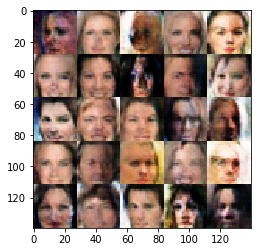

Epoch 1/1... Discriminator Loss: 1.0617... Generator Loss: 0.7642
Epoch 1/1... Discriminator Loss: 1.1125... Generator Loss: 0.6336
Epoch 1/1... Discriminator Loss: 1.5242... Generator Loss: 1.3450
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.4478
Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 1.1665
Epoch 1/1... Discriminator Loss: 1.1732... Generator Loss: 0.7888
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 0.4769
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 1.0979
Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 1.1651
Epoch 1/1... Discriminator Loss: 1.1456... Generator Loss: 1.0672
x1=  Tensor("generator_26/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_26/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_26/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_26/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


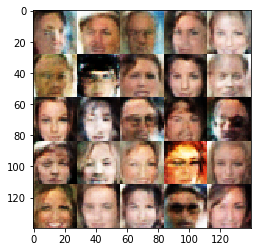

Epoch 1/1... Discriminator Loss: 1.6550... Generator Loss: 0.2751
Epoch 1/1... Discriminator Loss: 1.0824... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.4333
Epoch 1/1... Discriminator Loss: 1.1169... Generator Loss: 1.0820
Epoch 1/1... Discriminator Loss: 1.1400... Generator Loss: 1.1676
Epoch 1/1... Discriminator Loss: 1.0686... Generator Loss: 0.9791
Epoch 1/1... Discriminator Loss: 1.1089... Generator Loss: 1.0883
Epoch 1/1... Discriminator Loss: 1.1344... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.1930... Generator Loss: 1.0789
Epoch 1/1... Discriminator Loss: 1.1623... Generator Loss: 0.9275
x1=  Tensor("generator_27/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_27/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_27/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_27/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


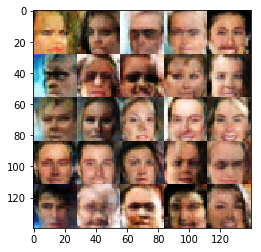

Epoch 1/1... Discriminator Loss: 1.3078... Generator Loss: 0.4642
Epoch 1/1... Discriminator Loss: 1.2556... Generator Loss: 0.6142
Epoch 1/1... Discriminator Loss: 0.9922... Generator Loss: 1.3270
Epoch 1/1... Discriminator Loss: 1.8818... Generator Loss: 0.2017
Epoch 1/1... Discriminator Loss: 1.0060... Generator Loss: 0.9479
Epoch 1/1... Discriminator Loss: 1.1809... Generator Loss: 0.5222
Epoch 1/1... Discriminator Loss: 1.5035... Generator Loss: 0.3841
Epoch 1/1... Discriminator Loss: 1.1558... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.1330... Generator Loss: 0.7043
Epoch 1/1... Discriminator Loss: 1.1105... Generator Loss: 1.3412
x1=  Tensor("generator_28/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_28/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_28/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_28/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


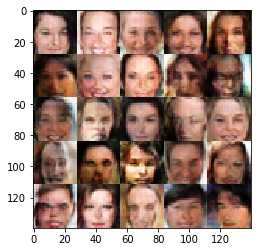

Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.3983
Epoch 1/1... Discriminator Loss: 1.1431... Generator Loss: 0.7219
Epoch 1/1... Discriminator Loss: 1.1180... Generator Loss: 0.6049
Epoch 1/1... Discriminator Loss: 1.1764... Generator Loss: 0.6516
Epoch 1/1... Discriminator Loss: 1.1153... Generator Loss: 0.6210
Epoch 1/1... Discriminator Loss: 1.5606... Generator Loss: 0.3365
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 0.7667
Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.5591
Epoch 1/1... Discriminator Loss: 1.1985... Generator Loss: 1.1885
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 1.7956
x1=  Tensor("generator_29/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_29/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_29/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_29/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


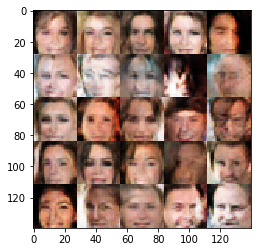

Epoch 1/1... Discriminator Loss: 1.2537... Generator Loss: 0.6042
Epoch 1/1... Discriminator Loss: 1.1486... Generator Loss: 1.0007
Epoch 1/1... Discriminator Loss: 1.1226... Generator Loss: 0.8035
Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.4283
Epoch 1/1... Discriminator Loss: 1.5249... Generator Loss: 0.3597
Epoch 1/1... Discriminator Loss: 1.1374... Generator Loss: 0.6785
Epoch 1/1... Discriminator Loss: 1.4271... Generator Loss: 2.1606
Epoch 1/1... Discriminator Loss: 1.1618... Generator Loss: 0.7284
Epoch 1/1... Discriminator Loss: 1.4649... Generator Loss: 0.3881
Epoch 1/1... Discriminator Loss: 1.1609... Generator Loss: 0.5955
x1=  Tensor("generator_30/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_30/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_30/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_30/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


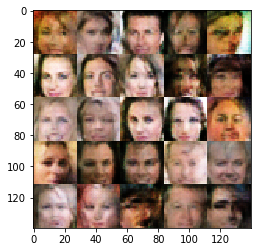

Epoch 1/1... Discriminator Loss: 1.0557... Generator Loss: 0.9965
Epoch 1/1... Discriminator Loss: 1.3359... Generator Loss: 0.4765
Epoch 1/1... Discriminator Loss: 1.2111... Generator Loss: 0.5716
Epoch 1/1... Discriminator Loss: 1.1381... Generator Loss: 0.5969
Epoch 1/1... Discriminator Loss: 1.0746... Generator Loss: 0.9071
Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.4352
Epoch 1/1... Discriminator Loss: 1.2630... Generator Loss: 0.5421
Epoch 1/1... Discriminator Loss: 1.1455... Generator Loss: 0.5710
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.4491
Epoch 1/1... Discriminator Loss: 1.2623... Generator Loss: 1.5244
x1=  Tensor("generator_31/Maximum:0", shape=(?, 4, 4, 256), dtype=float32)
x2=  Tensor("generator_31/Maximum_1:0", shape=(?, 7, 7, 128), dtype=float32)
x3=  Tensor("generator_31/Maximum_2:0", shape=(?, 14, 14, 64), dtype=float32)
logits=  Tensor("generator_31/conv2d_transpose_3/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


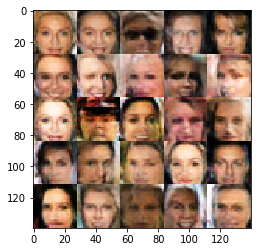

Epoch 1/1... Discriminator Loss: 1.4717... Generator Loss: 0.3686
Epoch 1/1... Discriminator Loss: 1.0376... Generator Loss: 1.5931
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.3865
Epoch 1/1... Discriminator Loss: 1.2691... Generator Loss: 0.4768
Epoch 1/1... Discriminator Loss: 1.2756... Generator Loss: 1.4149
Epoch 1/1... Discriminator Loss: 1.1853... Generator Loss: 0.5897


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.